<a href="https://colab.research.google.com/github/deep5050/PPI-analysis/blob/master/genomics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive')
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
from collections import OrderedDict

def revs_complement(dna):
    """
    help function for orf_identifier:
    to transform a sequence to reverse complementary sequence
    """
    pairs = {"A": "T", "C": "G", "G": "C", "T": "A"} # complementary code
    c_dna = [pairs[s] for s in dna] # complementary replace
    return "".join(c_dna)[::-1].strip() # reverse

def find_repeats( dna, n):
    """
    This help function for repeats_identifier find and count repeats for 
    each dna sequence
    dna: sequence, string
    n: number of repeats, int
    """
    repeats = {}
    for i in range(0, len(dna)):
        repeat = dna[i:i+n] # generate possible repeats
        if len(repeat) == n:
            if repeat not in repeats:
                repeats [repeat] = 1 # initiate record
            else:
                # count repeated repeats
                repeats[repeat] = repeats.get(repeat) + 1
    return dict(sorted(repeats.items()))

def get_seq_str(content):
  seq_str = ''
  seq = content[1:] # avoiding the header started with '>'
  for seq_ in seq:
    seq_str += str(seq_).replace('\n', '').replace('\r', '').replace(' ','')
  return seq_str.upper().strip()

def get_seq_neum(seq_str):
  table = {'A':'1','T':'2','G':'3','C':'4'}
  # seq_neum = seq_str.replace('A','1').replace('T','2').replace('G','3').replace('C','4')
  seq_neum = [ table[s] for s in seq_str]
  return "".join(seq_neum).strip()

def get_unique_patterns(dna,n):
  repeats = []
  for i in range(0, len(dna)):
    repeat = dna[i:i+n] # generate possible repeats
    if len(repeat) == n:
         repeats.append(repeat)
  return sorted(list(dict.fromkeys(repeats))) #eliminate duplicates

def get_seq_yr(seq_neum):
  table = { '1':'R','3':'R','2':'Y','4':'Y'}
  seq_yr = [ table[s] for s in seq_neum]
  # seq_yr = seq_neum.replace('1','R').replace('2','Y').replace('3','R').replace('4','Y')
  return "".join(seq_yr).strip()


def get_repeats_with_loc(dna,n):
  # get a sorted list of unique patterns
  patterns = get_unique_patterns(dna,n)
  #create a dictionary with pattern and its loc in the list
  patterns_loc = {}
  # to hold actual loc
  locs = []
  for k in range(0,len(patterns)):
    locs.append([])

  for i in range(0,len(patterns)):
    patterns_loc[patterns[i]] = i #insert the loc

  print(patterns_loc)
  # now actually including all the locs
  for i in range(0,len(dna)):
    repeat = dna[i:i+n]
    if len(repeat)==n:
      # get the location (where to be inserted in the pattern_loc) of the pattern just found
      arr_loc = patterns_loc[repeat]
      # print("arrloc{}".format(arr_loc))
      # include the actual location of occurance in dna
      locs[arr_loc].append(i)

  #returns the loc of each unique pattern as an array of array
  return locs

%matplotlib inline

def plot_protein_distr_by_name(dna):
  # protein distribution
  proteins = translate(seq_str)
  proteins_repeats = find_repeats(proteins,1)
  #
  frq_protein = list(proteins_repeats.values())
  proteins_names = list(proteins_repeats.keys())
  fig = plt.figure(figsize=[10,5])

  
  plt.bar(proteins_names,frq_protein,width=0.7,color='y')
  plt.title("PRODUCED PROTEINS FREQUENCY - sorted: name")
  plt.show()

def plot_protein_distr_by_frq(dna):
  # protein distribution
  proteins = translate(seq_str)
  proteins_repeats = find_repeats(proteins,1)
  # sort by values
  proteins_repeats = {k: v for k, v in sorted(proteins_repeats.items(), key=lambda item: item[1])}
  frq_protein = list(proteins_repeats.values())
  proteins_names = list(proteins_repeats.keys())
  fig = plt.figure(figsize=[10,5])

  
  plt.bar(proteins_names,frq_protein,width=0.7,color='r')
  plt.title("PRODUCED PROTEINS FREQUENCY - sorted: frqncy")
  plt.show()



def plot_pattern_distr_by_name(dna):
  codon_repeats = find_repeats(dna,3)
  frq = list(codon_repeats.values())
  seq_x = list(codon_repeats.keys())
  
  fig = plt.figure(figsize=[4,4])

  plt.bar(seq_x,frq,width=0.5)
  plt.ylabel('frequency')
  plt.title("CODON DISTRIBUTION - sorted: name")
  plt.show()

def plot_pattern_distr_by_frq(dna):
  codon_repeats = find_repeats(dna,3)
  codon_repeats = {k: v for k, v in sorted(codon_repeats.items(), key=lambda item: item[1])}
  frq = list(codon_repeats.values())
  seq_x = list(codon_repeats.keys())
  
  fig = plt.figure(figsize=[4,4])

  plt.bar(seq_x,frq,width=0.5,color='g')
  plt.ylabel('frequency')
  plt.title("CODON DISTRIBUTION - sorted: frqncy")
  plt.show() 








def percent_of_occurence(seq):
  repeats_ = find_repeats(seq,3)
  total_occur = 0
  percent_dist = {}
  for rpt in repeats_:
    total_occur += repeats_[rpt]
  # print("total",total_occur)
  for rpt in repeats_:
    percent_dist[rpt] = (repeats_[rpt]/total_occur)*100
  percents = [ per for per in percent_dist.values() ]
  return percent_dist,percents




def print_pattern_wise_locs(patterns,locs):
  patterns = patterns
  locs = locs
  for i in range(0,len(patterns)):
    print("Patterns:    {} | length: {} | loc: {}".format(patterns[i],len(locs[i]),locs[i]))



def translate(seq): 
       
    table = { 
        'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M', 
        'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T', 
        'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K', 
        'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',                  
        'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L', 
        'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P', 
        'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q', 
        'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R', 
        'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V', 
        'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A', 
        'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E', 
        'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G', 
        'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S', 
        'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L', 
        'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_', 
        'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W', 
    } 
    protein ="" 
    if len(seq)%3 == 0: 
        for i in range(0, len(seq), 3): 
            codon = seq[i:i + 3] 
            protein+= table[codon] 
    return protein 

YR dustribution
124223433313144333223334232314342342342333324133231331343343444444244422244414424324234424332332422344424334413424233343423423244433234213233334343342331333413232333442444331233433431424332223434324243213443334234433443333232322333323343233323133433443344233422143331134442244324432223311124441333144132334344443444243334133233133334231334433134323344413423442434333133423132133311143414333413234231113443242334233213233423214222443323141413431122213331114223333111222221423232221323114432133141311234344133441133243214142332242432221413224223311342122421311213412244131222312234232244443144134134111242323223111221342412442323411141423434113311144113323413133213123342312324414432111323141314123143423223242244314234432111434442312222234413423123344134211242342111232324431122131231231323211231322144224413341133111313222411341423112133211113131211222233441423411142224132442222413231331423242224132442414233233223342144214423244323413133142134412344244123224222424414124142314331222

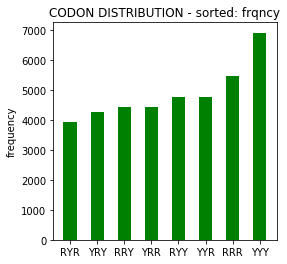

({'RRR': 14.01324571311223, 'RRY': 11.402608070643803, 'RYR': 10.119108738063456, 'RYY': 12.211212650169422, 'YRR': 11.402608070643803, 'YRY': 10.925146318923915, 'YYR': 12.211212650169422, 'YYY': 17.71485778827395}, [14.01324571311223, 11.402608070643803, 10.119108738063456, 12.211212650169422, 11.402608070643803, 10.925146318923915, 12.211212650169422, 17.71485778827395])
{'RRR': 5459, 'RRY': 4442, 'RYR': 3942, 'RYY': 4757, 'YRR': 4442, 'YRY': 4256, 'YYR': 4757, 'YYY': 6901}


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#with open('/gdrive/My Drive/Genomics/job/data/DJ1/ANXA7.txt', 'r') as f: #Dipankar
with open('/gdrive/My Drive/Genomics/Genomics/job/data/DJ1/ANXA7.txt', 'r') as f: #Nabanita
  # seq_str = ''


  content = f.readlines()


  ####################################################################
  # #print(content)
  # seq = content[1:]




  # for seq_ in seq:
  #   #print(seq_[0:])
    # seq_str += str(seq_).replace('\n', '').replace('\r', '').replace(' ','')

    # seq_str += str(seq_)

  # repeats = find_repeats(seq_str,3)
  # #sorted repeats
  # print(dict(sorted(repeats.items())))

  # # print(seq_str.upper().strip())  
  # ff = list(seq_str)
  # #print(ff)
  # seq_neum = seq_str.replace('A','1').replace('T','2').replace('G','3').replace('C','4')
  # print(seq_neum)
  # print(revs_complement(seq_str))
  # print(find_repeats(seq_str,3))
  # print(find_repeats(seq_neum,3))

  # frq = list(repeats.values())
  # seq_x = list(repeats.keys())
  # # print(frq)
  # # print(seq_x)
  # xx= get_repeats_with_loc(seq_str,3)
  
  # fig = plt.figure(figsize=[30,12])

  # plt.bar(seq_x,frq,width=0.5)
  # plt.ylabel('frequency')
  # plt.title("CODON DISTRIBUTION")

  # print(get_seq_yr(get_seq_neum(seq_str)))
  # patt = get_unique_patterns(seq_str,3)
  # locs = get_repeats_with_loc(seq_str,3)

  # print_pattern_wise_locs(patt,locs)

  # plot_codon_distr_by_name(seq_str)
  # plot_codon_distr_by_frq(seq_str)
  # plot_protein_distr_by_name(seq_str)
  # plot_protein_distr_by_frq(seq_str)

  ################################################################
  
  
  print("YR dustribution")
  seq_str = get_seq_str(content)
  seq_neum = get_seq_neum(seq_str)
  seq_yr = get_seq_yr(seq_neum)
  print(seq_neum)
  print(seq_yr)
  patterns = get_unique_patterns(seq_yr,3)
  print(patterns)
  plot_pattern_distr_by_frq(seq_yr)

print(percent_of_occurence(seq_yr))
print(find_repeats(seq_yr,3))

In [0]:

from os import listdir
from os.path import isfile, join


In [0]:
import json

In [0]:
def folder_wise_files(my_path,out_file_name):
  print("Directory:{}".format(my_path))
  outfile = out_file_name

  files_info = []
  file_names = []
  lengths = []
  only_files = [f for f in listdir(my_path) if isfile(join(my_path, f))]
  percent_array = []
  for file_ in only_files:
    temp ={}
    repeats={}
    seq_str=''
    seq_neum=''
    seq_yr=''
   
    
    file_path = my_path+'/'+file_
    file_names.append(file_.split('.txt')[0])

    with open(file_path,'r') as f:
      content = f.readlines()
      
      seq_str = get_seq_str(content)
      # print(seq_str)
      seq_neum = get_seq_neum(seq_str)
      seq_yr = get_seq_yr(seq_neum)
      # print(seq_str)
      # print(seq_neum)
      # print(file_,seq_str)

      # repeats = find_repeats(seq_str,3)
      # print(repeats)

      # # protein_seq = translate(seq_str)

      # length = len(seq_str)
      # lengths.append(length)

      # temp['name'] = file_.split('.txt')[0]
      # temp['seq'] = seq_str
      # temp['length'] = length
      # temp['dseq_neum'] = seq_neum
      # temp['repeats'] = repeats
      # temp['proteins'] = protein_seq.strip()

      # getting the percent of occureneces of patterns
      percent_occur,percent_list = percent_of_occurence(seq_yr)
      percent_array.append(percent_list)
      # print("{}".format(percent_list))
      # plot_pattern_distr_by_frq(seq_yr)
      #print(temp)
      #temp_json = json.dumps(temp)
      # files_info.append(temp)


  # index to file name mappings 
  file_map ={}
  for i in range(0,len(file_names)):
    file_map[i] = file_names[i]

  np_arr = np.array(percent_array)
  np_arr.shape=(len(file_names),8)
  df_percent = pd.DataFrame(np_arr)
  df_percent.columns = get_unique_patterns(seq_yr,3)
  df_percent.rename(index=file_map,inplace=True)

  df_percent.to_csv('/gdrive/My Drive/Genomics/job/data/output/'+outfile,index=True)
  print(df_percent)
  fig = plt.figure(figsize=[15,15])
  sns.heatmap(df_percent,annot=True,cmap="Reds")
  # https://likegeeks.com/seaborn-heatmap-tutorial/

  plt.show()

  #print(lengths)
  # write output
  # !mkdir '/gdrive/My Drive/Genomics/job/data/output'
  # write_path = '/gdrive/My Drive/Genomics/job/data/output/DJ1_output.json'
  # with open(write_path,'w') as wf:
  #   wf.write(str(files_info))




Directory:/gdrive/My Drive/Genomics/job/data/DJ1
               RRR        RRY        RYR  ...        YRY        YYR        YYY
AR       14.754792  11.144874  10.056968  ...  10.777772  11.865678  18.389899
ATP13A2  16.776227  11.917118   9.526006  ...   9.506785  11.894053  16.572483
MAP3K5   15.402604  11.425073  10.167294  ...  10.614655  11.872011  17.221702
DJ1      15.002096  11.572327  10.050314  ...  10.607966  12.129979  16.930818
LRRK2    15.011704  11.327340  10.804466  ...  11.211685  11.735252  16.846960
IMPDH2   14.896755  11.836283  10.582596  ...  10.435103  11.688791  17.016962
DAXX     22.144941  11.285618   8.795154  ...   7.448957   9.961858  19.115997
BAX      16.637980  11.761331   8.605852  ...   8.462421  11.632243  19.506598
ATP5J    16.092366  11.912647  10.364271  ...  10.077866  11.626242  16.378770
NIT2     14.127321  11.310786   9.770436  ...  10.600141  12.140492  18.599546
PARKIN   16.531440  11.764706  10.987153  ...  11.020960  11.832319  14.266396
PRD

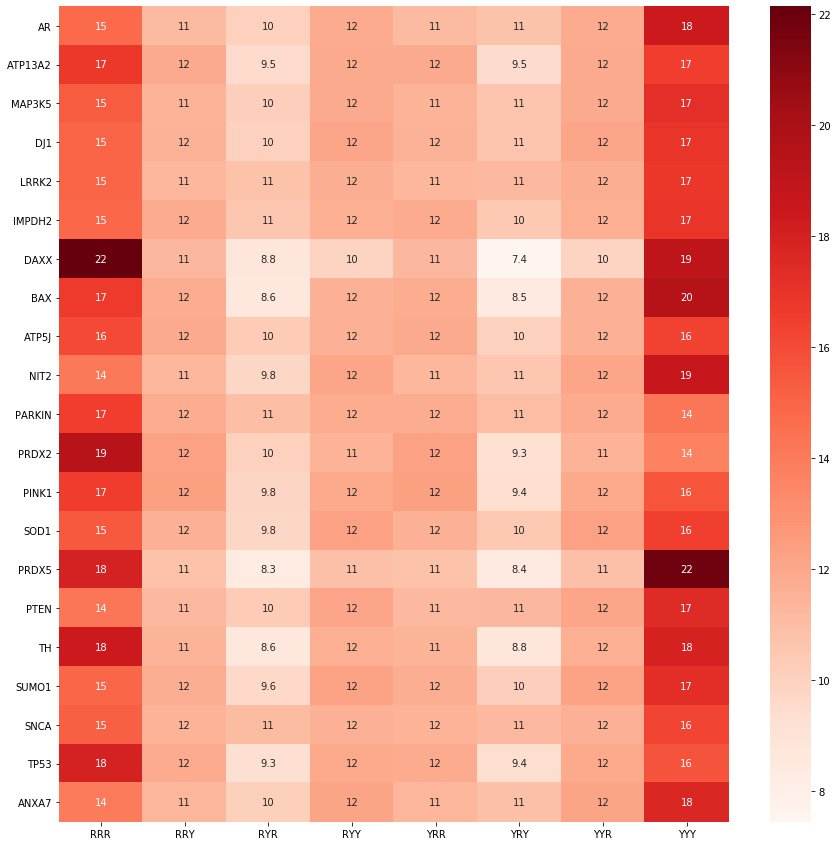

Directory:/gdrive/My Drive/Genomics/job/data/PINK1
                RRR        RRY        RYR  ...        YRY        YYR        YYY
AKT1      15.080739  11.682644  10.760132  ...  10.991889  11.914401  15.973152
DNM1L     15.080739  11.682644  10.760132  ...  10.991889  11.914401  15.973152
DJ1       15.002096  11.572327  10.050314  ...  10.607966  12.129979  16.930818
ATP13A2   16.776227  11.917118   9.526006  ...   9.506785  11.894053  16.572483
BECN1     16.921667  12.084890   9.737009  ...   9.299866  11.647747  16.569132
HSP90AA1  18.018507  12.147917  10.049825  ...   9.504118  11.600515  14.932380
HTRA2     16.337349  11.662651   9.710843  ...   9.975904  11.903614  16.819277
MFN2      16.272163  11.934119   9.861099  ...   9.672097  11.748117  16.827168
LRRK2     15.011704  11.327340  10.804466  ...  11.211685  11.735252  16.846960
MFN1      14.547072  11.485199  10.426460  ...  10.983357  12.044213  16.982171
MTERFD1   14.562888  11.272171   9.624561  ...  10.439363  12.086972 

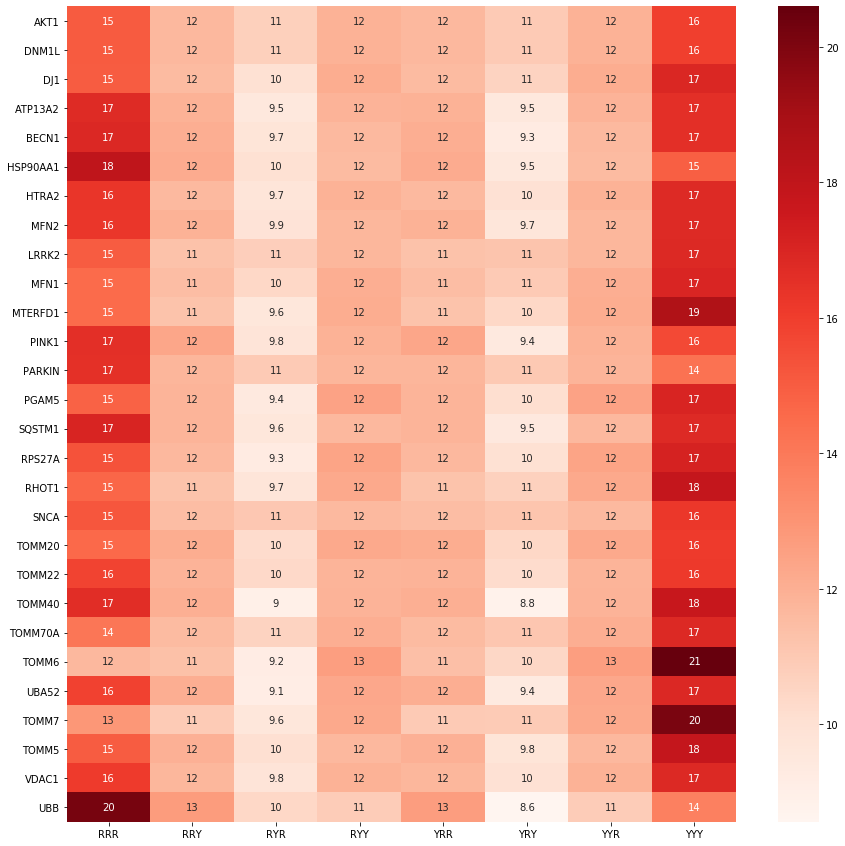

Directory:/gdrive/My Drive/Genomics/job/data/PARKIN
              RRR        RRY        RYR  ...        YRY        YYR        YYY
ATG7    15.514039  11.479184   9.957818  ...  10.357403  11.878770  17.455175
ATXN3   15.469751  11.837397  10.116918  ...  10.225098  11.945577  16.624365
CDC20   16.024949  11.412978   8.744153  ...   9.457839  12.126664  18.693775
CDC34   14.584740  11.305103   7.861484  ...   9.337320  12.780940  20.034726
CUL1    14.812342  11.433630  10.308361  ...  10.859869  11.986106  17.179956
DJ1     15.002096  11.572327  10.050314  ...  10.607966  12.129979  16.930818
FBXO40  15.782002  11.349958  10.271221  ...  10.612047  11.690784  17.253899
FBXO7   15.313898  11.624151  10.576445  ...  10.742090  11.793937  16.535531
FBXW7   14.436874  11.304131  10.552957  ...  11.230631  11.981805  17.207666
FBXW8   14.744792  11.392207  10.077500  ...  10.640241  11.955771  17.841511
FZR1    17.078266  11.814780   9.996882  ...   9.607109  11.428126  16.828812
KEAP1   16.2

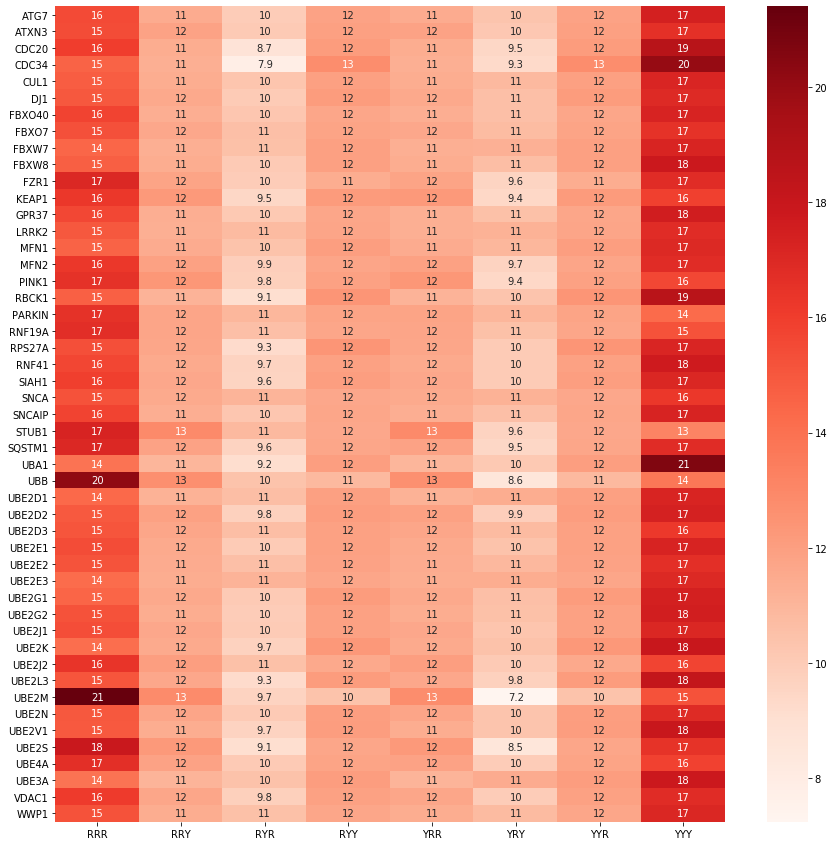

In [0]:
folder_wise_files('/gdrive/My Drive/Genomics/job/data/DJ1',"dj1.csv")
folder_wise_files('/gdrive/My Drive/Genomics/job/data/PINK1','pink1.csv')
folder_wise_files('/gdrive/My Drive/Genomics/job/data/PARKIN','parkin.csv')

In [0]:
# trying to find common patterns of length 3 among all the genes
def common_patterns_diff_lengths_among_all(my_path_,length_):
  my_path = my_path_
  only_files = [f for f in listdir(my_path) if isfile(join(my_path, f))]
  all_seq = []
  file_names = []
  for file_ in only_files:

    file_path = my_path+'/'+file_
    file_names.append(file_.split('.txt')[0])

    with open(file_path,'r') as f:
      content = f.readlines()
      seq_str = get_seq_str(content)
      all_seq.append(seq_str)

    uniq_patterns = []
    for seq in all_seq:
      patt = get_unique_patterns(seq,length_)
      uniq_patterns.append(patt)

  # print(len(uniq_patterns))

  # print(uniq_patterns[0])
  # print(uniq_patterns[1])
  # xx = set(uniq_patterns[0]) & set(uniq_patterns[1])
  # print(sorted(xx))

  common_pattern_among_all = set(uniq_patterns[0])
  for i in range(0,len(uniq_patterns)):
    # common_pattern_among_all = common_pattern_among_all.intersection(set(uniq_patterns[i]))
    common_pattern_among_all = common_pattern_among_all & set(uniq_patterns[i])

  for patt in uniq_patterns:
    print(len(patt),":",patt)

  print('-'*50)
  print(len(common_pattern_among_all),":",sorted(common_pattern_among_all))


In [0]:
print("ok")